## LONG SHORT TERM MEMORY FOR Pfizer STOCK

In [1]:
# Importing all the required packages and libraries

import math
from math import sqrt
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, Activation

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#Fetching data for Pfizer Stock for 5 years

df = web.DataReader('PFE', data_source='yahoo', start='2014-01-01', end='2020-12-31') 
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529
2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180
2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004
2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232
2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999
2014-01-09,29.525618,29.041746,29.487665,29.345350,21692901.0,22.501451
2014-01-10,29.364326,28.937382,29.259962,29.117647,22890877.0,22.326855
2014-01-13,29.440228,28.880455,29.278936,28.975332,25276396.0,22.217728
2014-01-14,29.459204,28.984819,29.013283,29.411764,34757336.0,22.552383


In [3]:
print(df.shape)

(1763, 6)


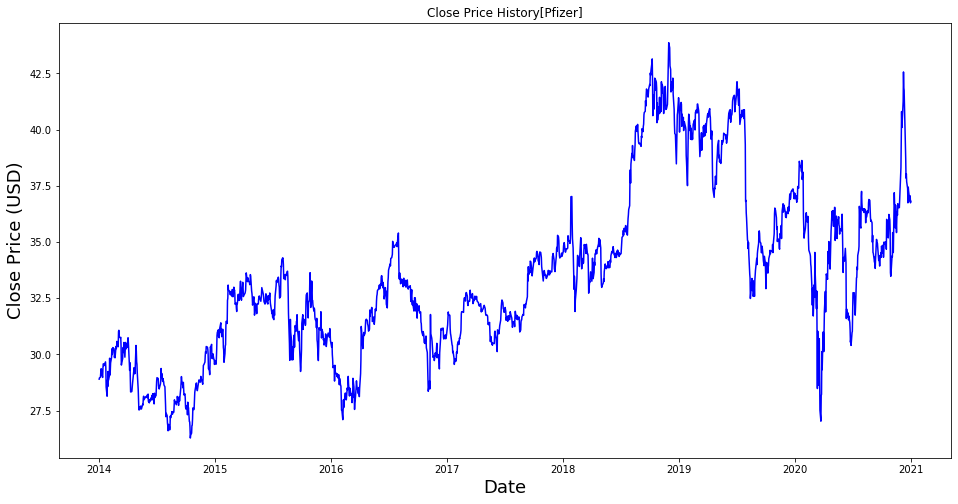

In [4]:
# Visualize the closing price history for Pfizer stock

plt.figure(figsize=(16,8))
plt.title('Close Price History[Pfizer]')
plt.plot(df['Close'], color='b')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column.
data = df.filter(['Close'])

# Converting the dataframe to a numpy array.
dataset = data.values

# Compute the number of rows to train the model on.

training_data_len = math.ceil( len(dataset) *.8)

In [6]:
# Min-Max Normalization.
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
# Create the scaled training dataset.
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train data sets
X_train=[]
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
# Convert x_train and y_train to numpy arrays.
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshape the data into the shape accepted by the LSTM.
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
# Build the LSTM network model.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Activation('linear'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                7600      
_________________________________________________________________
activation (Activation)      (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model.
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1351/1351 [==============================] - 25s 17ms/step - loss: 0.0090
Epoch 2/10
1351/1351 [==============================] - 25s 18ms/step - loss: 0.0018
Epoch 3/10
1351/1351 [==============================] - 24s 18ms/step - loss: 0.0013
Epoch 4/10
1351/1351 [==============================] - 25s 19ms/step - loss: 0.0010
Epoch 5/10
1351/1351 [==============================] - 25s 18ms/step - loss: 8.2269e-04
Epoch 6/10
1351/1351 [==============================] - 25s 18ms/step - loss: 7.2189e-04
Epoch 7/10
1351/1351 [==============================] - 25s 18ms/step - loss: 8.4934e-04
Epoch 8/10
1351/1351 [==============================] - 25s 18ms/step - loss: 7.2824e-04
Epoch 9/10
1351/1351 [==============================] - 25s 19ms/step - loss: 6.3688e-04
Epoch 10/10
1351/1351 [==============================] - 25s 18ms/step - loss: 7.9202e-04


In [13]:
# Test dataset.
test_data = scaled_data[training_data_len-60:, :]

# Create the x_test and y_test datasets.
X_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [14]:
# Convert x_test to a numpy array.
X_test = np.array(X_test)

In [15]:
# Reshape the data into the shape accepted by the LSTM.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
# Getting the models predicted price values.
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling

In [17]:
# Calculate/Get the value of RMSE.
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
mse = mean_squared_error(predictions,y_test)
rmse_new = sqrt(mse)
r = r2_score(predictions,y_test)

In [18]:
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)

RMSE = {} 0.7047701761755565
R-Squared Score = {} 0.8945296381710623


In [19]:
# Plot/Create the data for the graph.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

RMSE = {} 0.7047701761755565
R-Squared Score = {} 0.8945296381710623


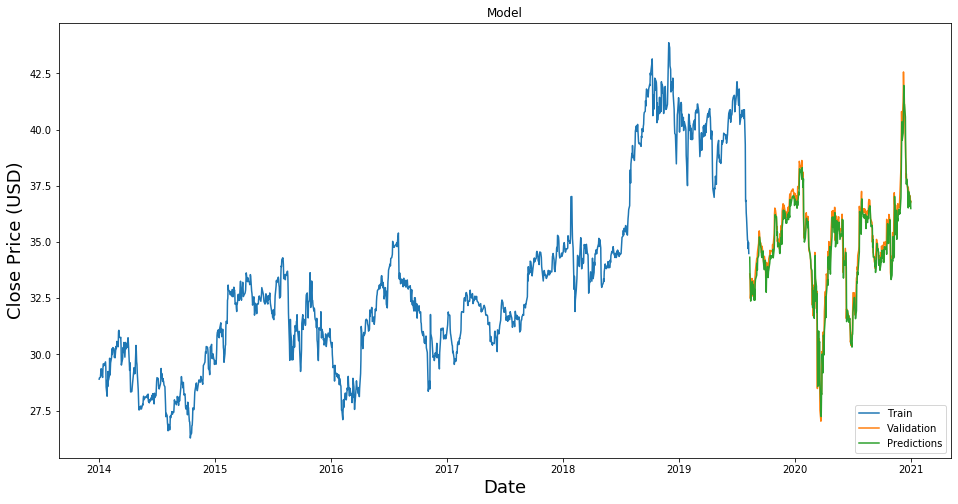

In [20]:
# Visualize the data.
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2019-08-12,33.576851,34.319450
2019-08-13,33.396584,33.425663
2019-08-14,32.485767,33.275906
2019-08-15,32.713470,32.370079
2019-08-16,32.874763,32.621830
...,...,...
2020-12-24,37.270000,37.245724
2020-12-28,36.820000,37.017265
2020-12-29,37.049999,36.567150
